In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [37]:
df=pd.read_csv('economic_index.csv')

In [38]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [39]:
df.drop(columns=['Unnamed: 0', 'year', 'month'], inplace=True,axis=1)

In [40]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

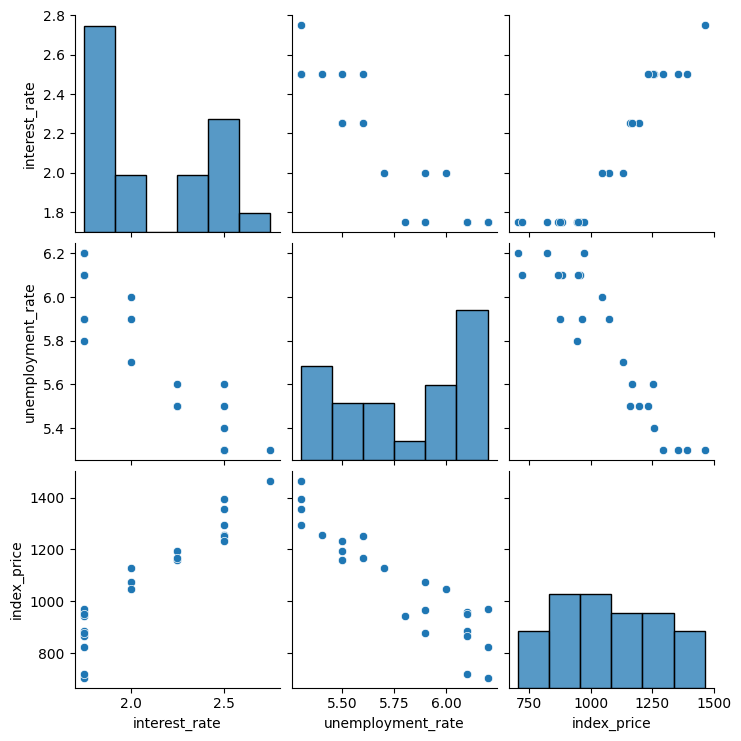

In [41]:
sns.pairplot(df)

In [42]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

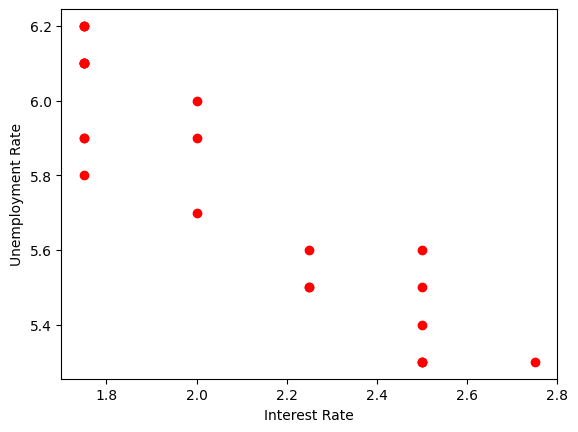

In [43]:
plt.scatter(df['interest_rate'], df['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [44]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<Axes: xlabel='interest_rate', ylabel='index_price'>

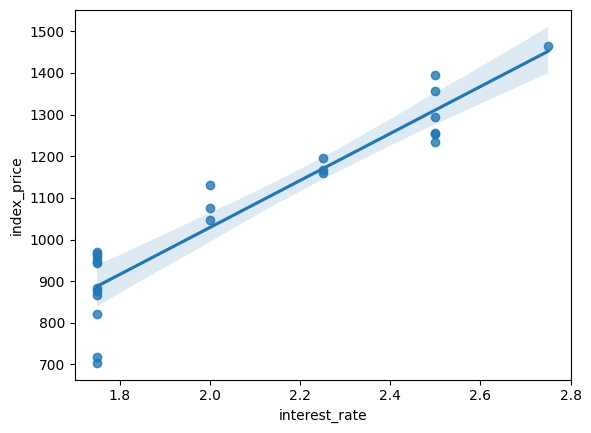

In [46]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [53]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train_scaled, y_train ,cv=3,scoring='neg_mean_absolute_error')

In [54]:
cv_scores

array([-56.80595361, -84.48077319, -50.85615194])

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 6957.105303258842
R^2 Score: 0.8254940547158574


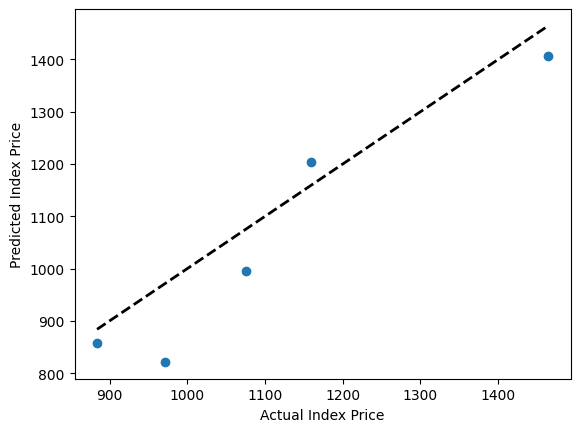

In [56]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Index Price')
plt.ylabel('Predicted Index Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [58]:
residuals = y_test - y_pred
residuals

8     -45.144037
16    149.373967
0      57.614653
18     26.318628
11     80.142634
Name: index_price, dtype: float64

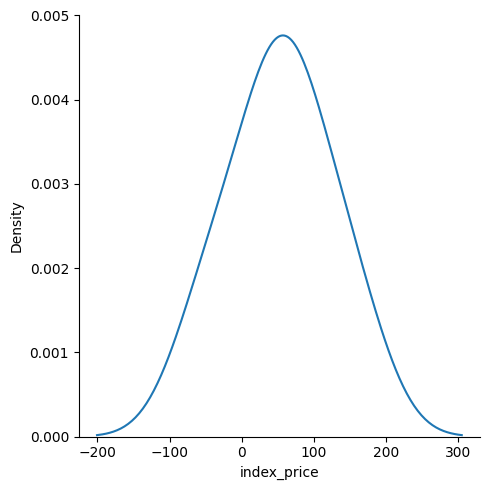

In [61]:
sns.displot(residuals,kind="kde")

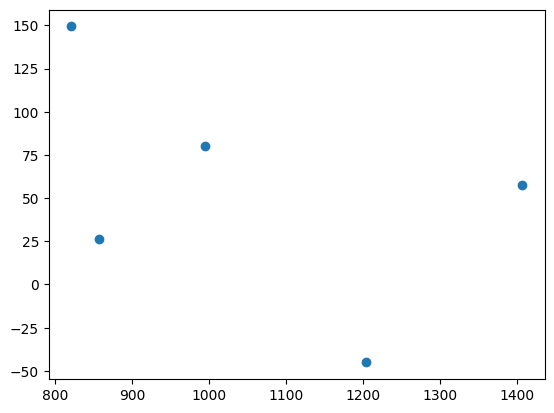

In [62]:
plt.scatter(y_pred, residuals) 

In [63]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     75.80
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           6.90e-09
Time:                        17:48:30   Log-Likelihood:                -105.94
No. Observations:                  19   AIC:                             217.9
Df Residuals:                      16   BIC:                             220.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1059.4211     15.966     66.356      0.0